In [1]:
import matplotlib.pyplot as plt 
import cv2
from sklearn.cluster import KMeans

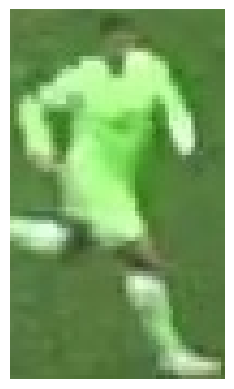

In [2]:
img_path = '../output_video/player_.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

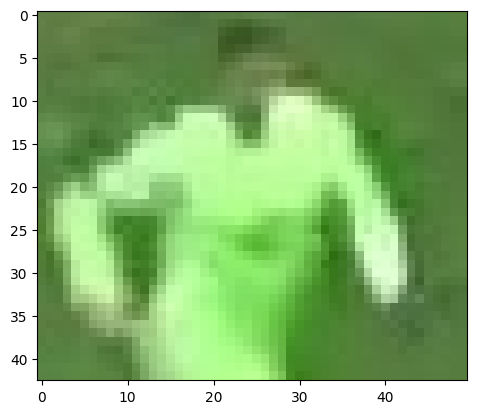

In [3]:
half_img = img[0:int(img.shape[0]/2),:]
plt.imshow(half_img)

c:\Users\632366\Documents\football_analysis\mlenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\632366\Documents\football_analysis\mlenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\632366\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\632366\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __i

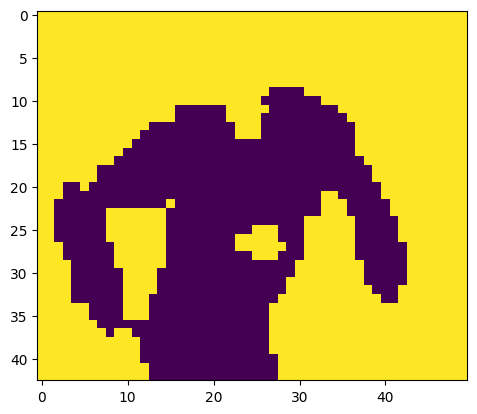

In [4]:
# Reshape the image into 2d array
image_2d = half_img.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(half_img.shape[0], half_img.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [7]:
corner_cluster = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_cluster), key = corner_cluster.count)
non_player_cluster

np.int32(1)

In [8]:
player_cluster = 1 - non_player_cluster
player_cluster

np.int32(0)

In [9]:
kmeans.cluster_centers_[player_cluster]

array([171.12648221, 235.28853755, 142.79710145])